In [1]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00


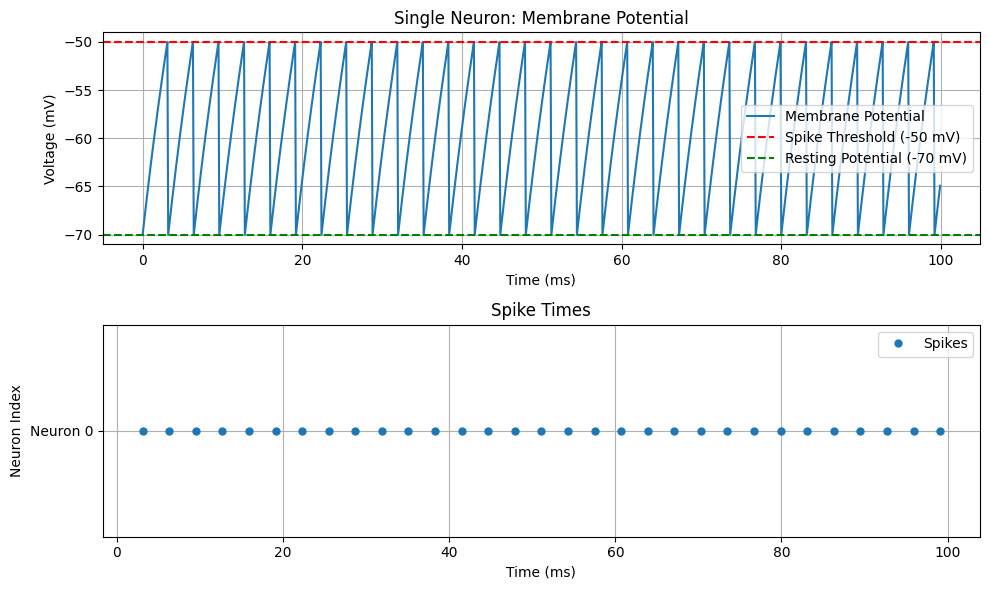

In [14]:

from brian2 import *
import matplotlib.pyplot as plt


set_device('runtime')
start_scope()
seed(123)
e
duration = 100*ms

# Define the Leaky Integrate-and-Fire (LIF) neuron model

eqs = '''
dv/dt = (-v + R*I) / tau : volt  # Membrane potential dynamics
I : amp  # Input current (constant in this case)
R : ohm  # Membrane resistance
tau : second  # Time constant for leak
'''


neuron = NeuronGroup(1, eqs, threshold='v > -50*mV', reset='v = -70*mV', method='exact')

# Set initial conditions and parameters
neuron.v = -70*mV
neuron.I = 0.1*nA
neuron.R = 50*Mohm
neuron.tau = 10*ms

# Record the membrane potential and spikes
voltage_monitor = StateMonitor(neuron, 'v', record=True)
spike_monitor = SpikeMonitor(neuron)
run(duration)

# Plot the results
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(voltage_monitor.t/ms, voltage_monitor.v[0]/mV, label='Membrane Potential')
plt.axhline(y=-50, color='r', linestyle='--', label='Spike Threshold (-50 mV)')
plt.axhline(y=-70, color='g', linestyle='--', label='Resting Potential (-70 mV)')
plt.title('Single Neuron: Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(spike_monitor.t/ms, spike_monitor.i, 'o', markersize=5, label='Spikes')
plt.title('Spike Times')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.yticks([0], ['Neuron 0'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

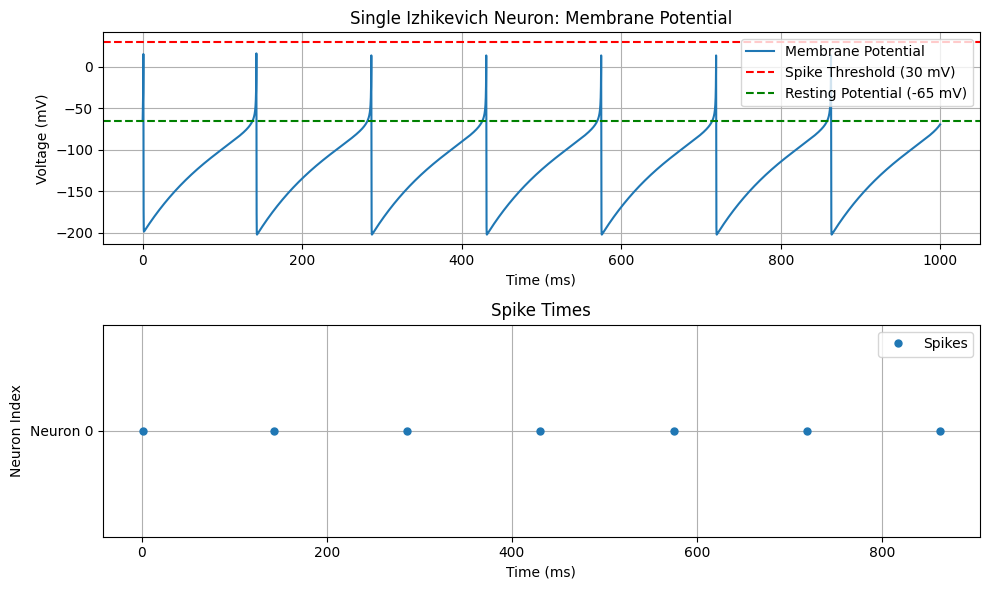

In [17]:
from brian2 import *
import matplotlib.pyplot as plt


set_device('runtime')
start_scope()
seed(123)


duration = 1000*ms

# Define the Izhikevich neuron model

eqs = '''
dv/dt = (0.04/mV*v**2 + 5*v + 140*mV - u + I)/ms : volt  # Membrane potential
du/dt = a*(b*v - u) : volt  # Recovery variable
I : volt  # Input current (constant)
a : 1/second  # Recovery time scale
b : 1  # Sensitivity of u to v (dimensionless)
c : volt  # Reset voltage
d : volt  # Recovery increment after spike
'''

neuron = NeuronGroup(1, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')

# Set initial conditions and parameters
neuron.v = -65*mV
neuron.u = -13*mV
neuron.I = 50*mV
neuron.a = 0.02/ms
neuron.b = 0.2
neuron.c = -65*mV
neuron.d = 0.8*volt

voltage_monitor = StateMonitor(neuron, 'v', record=True)
spike_monitor = SpikeMonitor(neuron)
run(duration)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(voltage_monitor.t/ms, voltage_monitor.v[0]/mV, label='Membrane Potential')
plt.axhline(y=30, color='r', linestyle='--', label='Spike Threshold (30 mV)')
plt.axhline(y=-65, color='g', linestyle='--', label='Resting Potential (-65 mV)')
plt.title('Single Izhikevich Neuron: Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(spike_monitor.t/ms, spike_monitor.i, 'o', markersize=5, label='Spikes')
plt.title('Spike Times')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.yticks([0], ['Neuron 0'])
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

WARNING    'Apost' is an internal variable of group 'synapses_2', but also exists in the run namespace with the value -0.015. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Apre' is an internal variable of group 'synapses_2', but also exists in the run namespace with the value 0.01. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Apost' is an internal variable of group 'synapses_8', but also exists in the run namespace with the value -0.015. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Apre' is an internal variable of group 'synapses_8', but also exists in the run namespace with the value 0.01. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


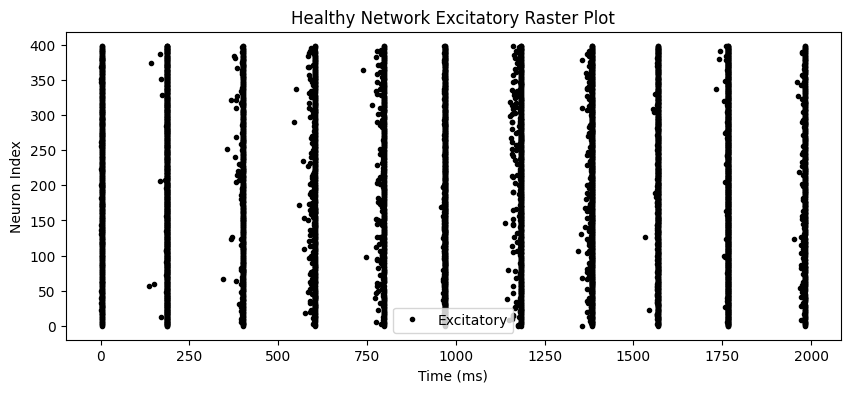

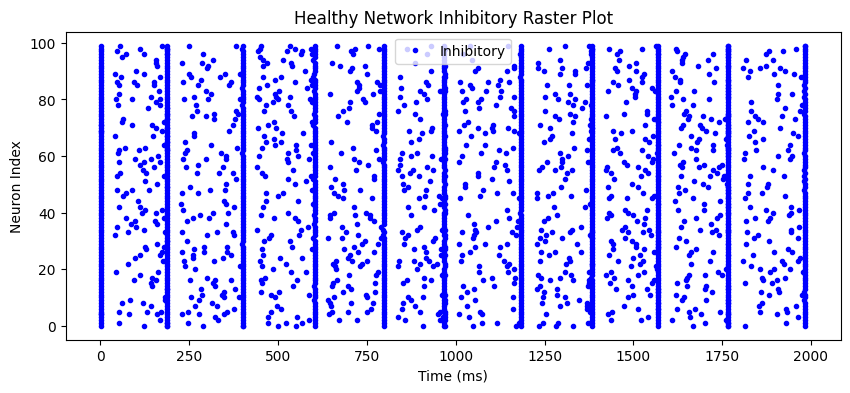

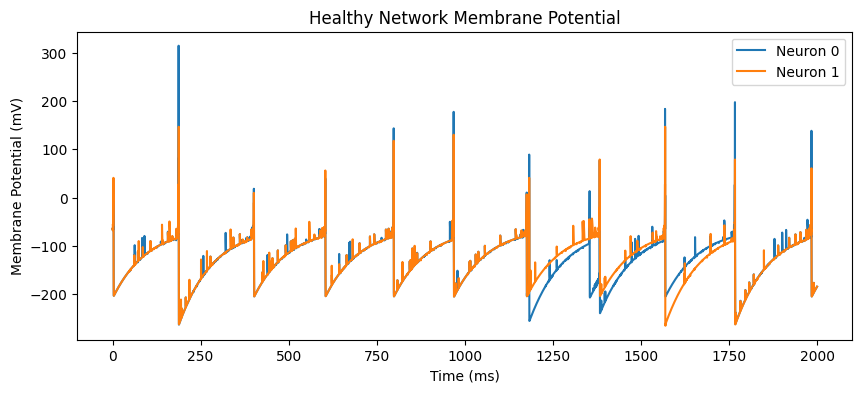

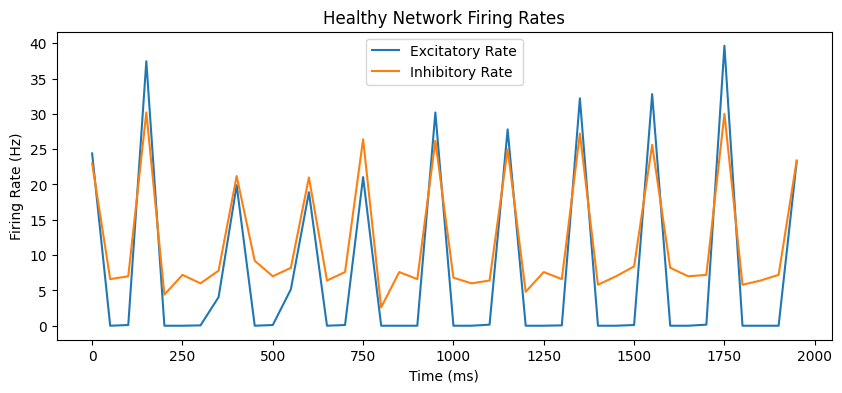

Healthy Network - Average excitatory rate: 7.94 Hz
Healthy Network - Average inhibitory rate: 11.87 Hz


In [6]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
start_scope()

defaultclock.dt = 0.1*ms

# Parameters
N = 500
Ne = 400  # Excitatory
Ni = 100  # Inhibitory
duration = 2000*ms n

# Izhikevich parameters
a_e = 0.02/ms; b_e = 0.2; c_e = -65*mV; d_e = 0.8*volt
a_i = 0.1/ms; b_i = 0.2; c_i = -65*mV; d_i = 0.2*volt

# Neuron equations
eqs = '''
dv/dt = (0.04/mV*v**2 + 5*v + 140*mV - u + I)/ms : volt  # Membrane potential
du/dt = a*(b*v - u) : volt  # Recovery variable
I : volt  # Input current
a : 1/second  # Recovery time scale
b : 1  # Sensitivity of u to v (dimensionless)
c : volt  # Reset voltage
d : volt  # Recovery increment after spike
'''

# Neuron groups
E = NeuronGroup(Ne, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
I = NeuronGroup(Ni, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
E.a = a_e; E.b = b_e; E.c = c_e; E.d = d_e
I.a = a_i; I.b = b_i; I.c = c_i; I.d = d_i
E.v = -65*mV; I.v = -65*mV
E.u = E.b * E.v; I.u = I.b * I.v
E.I = 0*mV; I.I = 0*mV

# Background Poisson input
input_group_E = PoissonGroup(Ne, rates=20*Hz)
input_syn_E = Synapses(input_group_E, E, 'w : volt', on_pre='v_post += w')
input_syn_E.connect(j='i')
input_syn_E.w = 0.04*volt

input_group_I = PoissonGroup(Ni, rates=10*Hz)
input_syn_I = Synapses(input_group_I, I, 'w : volt', on_pre='v_post += w')
input_syn_I.connect(j='i')
input_syn_I.w = 0.025*volt

# Common Poisson input for synchrony
N_common = int(Ne * 0.5)
common_input = PoissonGroup(1, rates=40*Hz)
common_syn_E = Synapses(common_input, E[:N_common], 'w : volt', on_pre='v_post += w')
common_syn_E.connect()
common_syn_E.w = 0.02*volt

# Synapses with STDP for excitatory connections
taupre = taupost = 20*ms
Apre = 0.01; Apost = -0.015
wmax = 1
eqs_stdp = '''
w : 1
dApre/dt = -Apre / taupre : 1 (event-driven)
dApost/dt = -Apost / taupost : 1 (event-driven)
'''
on_pre_stdp = '''
v_post += w * volt
Apre += Apre
w = clip(w + Apost, 0, wmax)
'''
on_post_stdp = '''
Apost += Apost
w = clip(w + Apre, 0, wmax)
'''

# Excitatory-to-excitatory
see = Synapses(E, E, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
see.connect(p=0.2)
see.w = 0.0062

# Excitatory-to-inhibitory
sei = Synapses(E, I, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
sei.connect(p=0.2)
sei.w = 0.002

# Inhibitory synapses (no STDP)
sie = Synapses(I, E, 'w : volt', on_pre='v_post -= w')
sie.connect(p=0.2)
sie.w = 0.0015*volt

sii = Synapses(I, I, 'w : volt', on_pre='v_post -= w')
sii.connect(p=0.15)
sii.w = 0.0004*volt

# Monitors
spike_mon_E = SpikeMonitor(E)
spike_mon_I = SpikeMonitor(I)
state_mon_E = StateMonitor(E, 'v', record=[0, 1])

# Run simulation
run(duration)

# Excitatory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k', label='Excitatory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Healthy Network Excitatory Raster Plot')
plt.legend()
plt.savefig('healthy_excitatory_raster.png')
plt.show()

# Inhibitory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_I.t/ms, spike_mon_I.i, '.b', label='Inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Healthy Network Inhibitory Raster Plot')
plt.legend()
plt.savefig('healthy_inhibitory_raster.png')
plt.show()

# Membrane potential
plt.figure(figsize=(10, 4))
plt.plot(state_mon_E.t/ms, state_mon_E.v[0]/mV, label='Neuron 0')
plt.plot(state_mon_E.t/ms, state_mon_E.v[1]/mV, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Healthy Network Membrane Potential')
plt.legend()
plt.savefig('healthy_potential.png')
plt.show()

# Firing rate
bin_size = 50*ms
bins = np.arange(0, duration/ms + bin_size/ms, bin_size/ms)
spike_counts_E, _ = np.histogram(spike_mon_E.t/ms, bins=bins)
spike_counts_I, _ = np.histogram(spike_mon_I.t/ms, bins=bins)
rates_E = spike_counts_E / (bin_size/second) / Ne
rates_I = spike_counts_I / (bin_size/second) / Ni

plt.figure(figsize=(10, 4))
plt.plot(bins[:-1], rates_E, label='Excitatory Rate')
plt.plot(bins[:-1], rates_I, label='Inhibitory Rate')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Healthy Network Firing Rates')
plt.legend()
plt.savefig('healthy_rates.png')
plt.show()

avg_rate_E = mean(spike_mon_E.count / (duration/second))
avg_rate_I = mean(spike_mon_I.count / (duration/second))
print(f'Healthy Network - Average excitatory rate: {avg_rate_E:.2f} Hz')
print(f'Healthy Network - Average inhibitory rate: {avg_rate_I:.2f} Hz')



WARNING    'Apost' is an internal variable of group 'synapses_11', but also exists in the run namespace with the value -0.015. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Apre' is an internal variable of group 'synapses_11', but also exists in the run namespace with the value 0.01. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


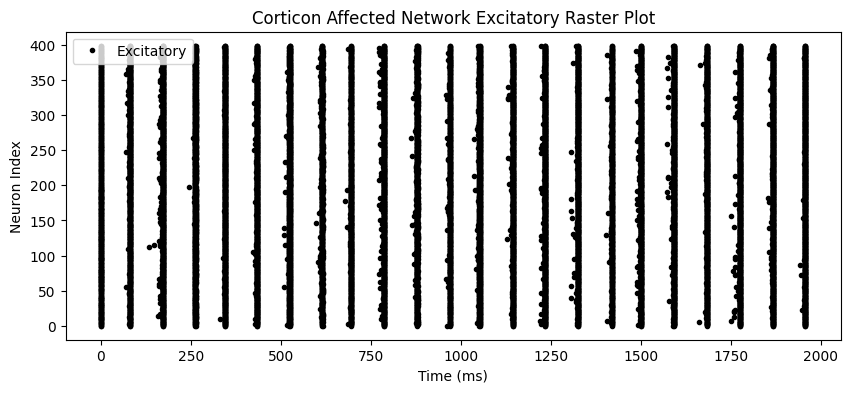

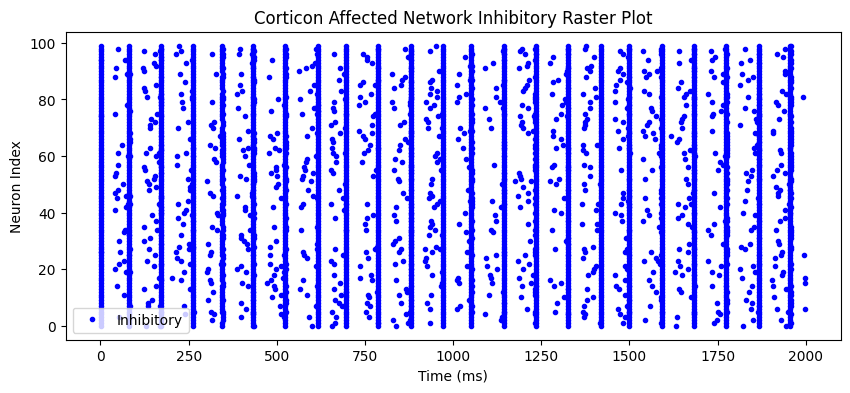

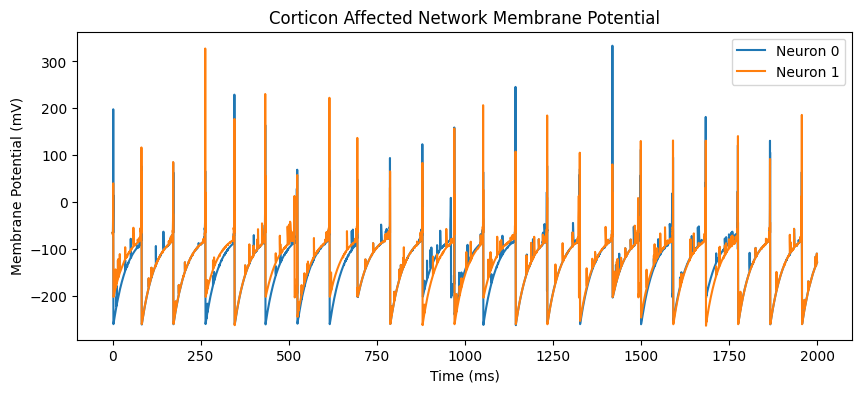

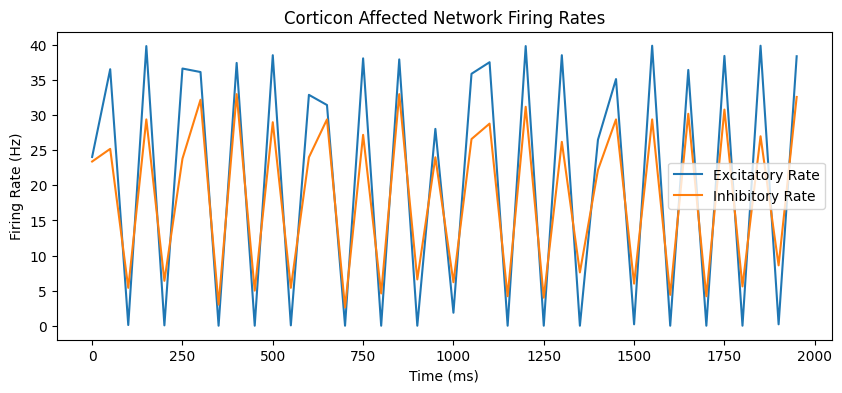

Corticon Affected Network - Average excitatory rate: 20.67 Hz
Corticon Affected Network - Average inhibitory rate: 18.45 Hz


In [7]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
start_scope()

# Set time step for numerical stability
defaultclock.dt = 0.1*ms

# Parameters
N = 500
Ne = 400
Ni = 100
duration = 2000*ms

# Izhikevich parameters
a_e = 0.05/ms; b_e = 0.2; c_e = -65*mV; d_e = 0.8*volt # Corticon Attack Causes increase in a_e
a_i = 0.1/ms; b_i = 0.2; c_i = -65*mV; d_i = 0.2*volt

# Neuron equations
eqs = '''
dv/dt = (0.04/mV*v**2 + 5*v + 140*mV - u + I)/ms : volt  # Membrane potential
du/dt = a*(b*v - u) : volt  # Recovery variable
I : volt  # Input current
a : 1/second  # Recovery time scale
b : 1  # Sensitivity of u to v (dimensionless)
c : volt  # Reset voltage
d : volt  # Recovery increment after spike
'''

# Neuron groups
E = NeuronGroup(Ne, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
I = NeuronGroup(Ni, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
E.a = a_e; E.b = b_e; E.c = c_e; E.d = d_e
I.a = a_i; I.b = b_i; I.c = c_i; I.d = d_i
E.v = -65*mV; I.v = -65*mV
E.u = E.b * E.v; I.u = I.b * I.v


# Background Poisson input
input_group_E = PoissonGroup(Ne, rates=20*Hz)
input_syn_E = Synapses(input_group_E, E, 'w : volt', on_pre='v_post += w')
input_syn_E.connect(j='i')
input_syn_E.w = 0.04*volt

input_group_I = PoissonGroup(Ni, rates=10*Hz)
input_syn_I = Synapses(input_group_I, I, 'w : volt', on_pre='v_post += w')
input_syn_I.connect(j='i')
input_syn_I.w = 0.025*volt

# Common Poisson input for synchrony
N_common = int(Ne * 0.5) s
common_input = PoissonGroup(1, rates=40*Hz)
common_syn_E = Synapses(common_input, E[:N_common], 'w : volt', on_pre='v_post += w')
common_syn_E.connect()
common_syn_E.w = 0.02*volt

# Synapses with STDP for excitatory connections
taupre = taupost = 20*ms
Apre = 0.01; Apost = -0.015
wmax = 1
eqs_stdp = '''
w : 1
dApre/dt = -Apre / taupre : 1 (event-driven)
dApost/dt = -Apost / taupost : 1 (event-driven)
'''
on_pre_stdp = '''
v_post += w * volt
Apre += Apre
w = clip(w + Apost, 0, wmax)
'''
on_post_stdp = '''
Apost += Apost
w = clip(w + Apre, 0, wmax)
'''

# Excitatory-to-excitatory
see = Synapses(E, E, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
see.connect(p=0.2)
see.w = 0.0062

# Excitatory-to-inhibitory
sei = Synapses(E, I, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
sei.connect(p=0.2)
sei.w = 0.002

# Inhibitory synapses (no STDP)
sie = Synapses(I, E, 'w : volt', on_pre='v_post -= w')
sie.connect(p=0.2)
sie.w = 0.0015*volt

sii = Synapses(I, I, 'w : volt', on_pre='v_post -= w')
sii.connect(p=0.15)
sii.w = 0.0004*volt

# Monitors
spike_mon_E = SpikeMonitor(E)
spike_mon_I = SpikeMonitor(I)
state_mon_E = StateMonitor(E, 'v', record=[0, 1])

# Run simulation
run(duration)

# Excitatory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k', label='Excitatory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Corticon Affected Network Excitatory Raster Plot')
plt.legend()

plt.show()

# Inhibitory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_I.t/ms, spike_mon_I.i, '.b', label='Inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Corticon Affected Network Inhibitory Raster Plot')
plt.legend()

plt.show()

# Membrane potential
plt.figure(figsize=(10, 4))
plt.plot(state_mon_E.t/ms, state_mon_E.v[0]/mV, label='Neuron 0')
plt.plot(state_mon_E.t/ms, state_mon_E.v[1]/mV, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Corticon Affected Network Membrane Potential')
plt.legend()

plt.show()

# Firing rate
bin_size = 50*ms
bins = np.arange(0, duration/ms + bin_size/ms, bin_size/ms)
spike_counts_E, _ = np.histogram(spike_mon_E.t/ms, bins=bins)
spike_counts_I, _ = np.histogram(spike_mon_I.t/ms, bins=bins)
rates_E = spike_counts_E / (bin_size/second) / Ne
rates_I = spike_counts_I / (bin_size/second) / Ni

plt.figure(figsize=(10, 4))
plt.plot(bins[:-1], rates_E, label='Excitatory Rate')
plt.plot(bins[:-1], rates_I, label='Inhibitory Rate')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Corticon Affected Network Firing Rates')
plt.legend()

plt.show()


avg_rate_E = mean(spike_mon_E.count / (duration/second))
avg_rate_I = mean(spike_mon_I.count / (duration/second))
print(f'Corticon Affected Network - Average excitatory rate: {avg_rate_E:.2f} Hz')
print(f'Corticon Affected Network - Average inhibitory rate: {avg_rate_I:.2f} Hz')



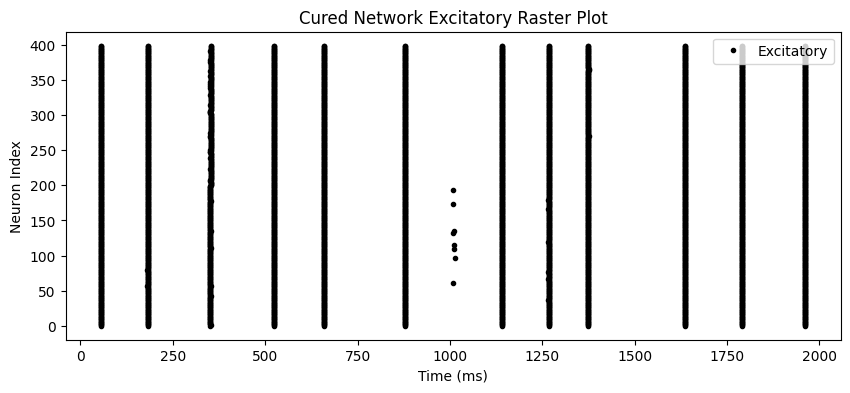

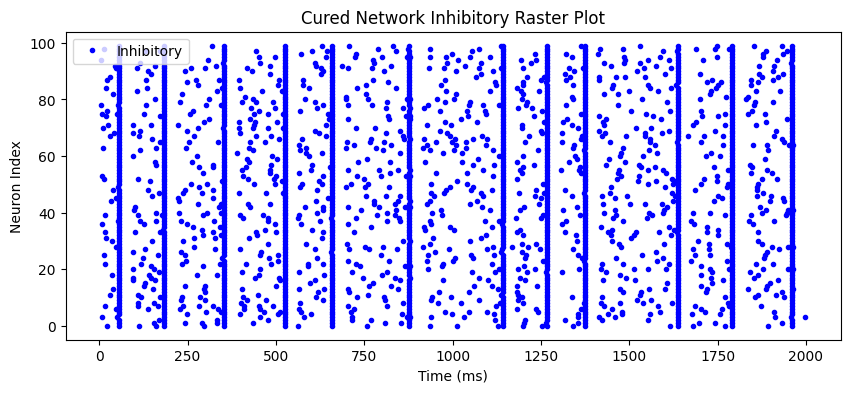

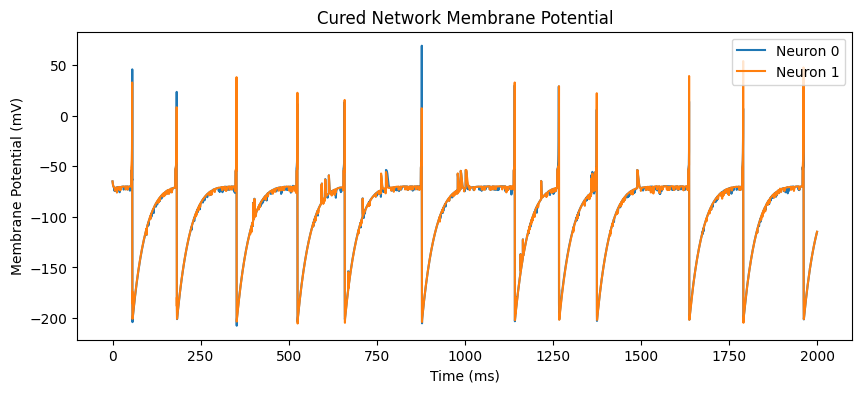

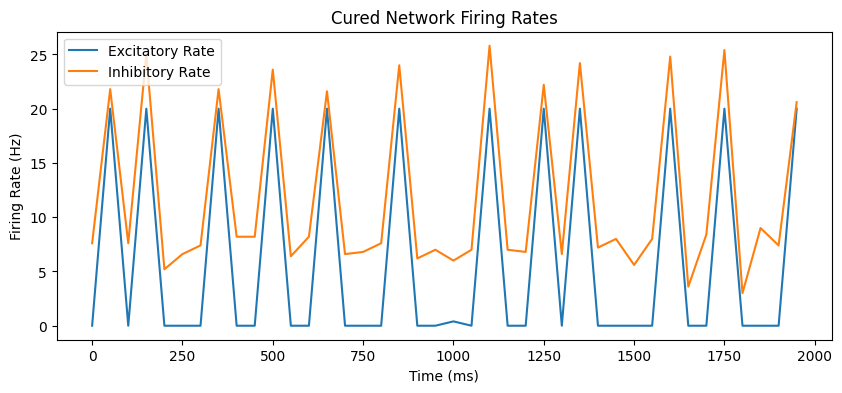

Cured Network - Average excitatory rate: 6.01 Hz
Cured Network - Average inhibitory rate: 11.85 Hz


In [8]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(42)
start_scope()

=
defaultclock.dt = 0.1*ms

# Parameters
N = 500
Ne = 400
Ni = 100
duration = 2000*ms

# Izhikevich parameters
a_e = 0.05/ms; b_e = 0.2; c_e = -65*mV; d_e = 0.8*volt
a_i = 0.1/ms; b_i = 0.2; c_i = -65*mV; d_i = 0.2*volt

# Neuron equations
eqs = '''
dv/dt = (0.04/mV*v**2 + 5*v + 140*mV - u + I)/ms : volt  # Membrane potential
du/dt = a*(b*v - u) : volt  # Recovery variable
I : volt  # Input current
a : 1/second  # Recovery time scale
b : 1  # Sensitivity of u to v (dimensionless)
c : volt  # Reset voltage
d : volt  # Recovery increment after spike
'''

# Neuron groups
E = NeuronGroup(Ne, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
I = NeuronGroup(Ni, eqs, threshold='v>=30*mV', reset='v=c; u+=d', method='rk4')
E.a = a_e; E.b = b_e; E.c = c_e; E.d = d_e
I.a = a_i; I.b = b_i; I.c = c_i; I.d = d_i
E.v = -65*mV; I.v = -65*mV
E.u = E.b * E.v; I.u = I.b * I.v


# Background Poisson input
input_group_E = PoissonGroup(Ne, rates=3*Hz)  # reduced to reduce excitatory drive
input_syn_E = Synapses(input_group_E, E, 'w : volt', on_pre='v_post += w')
input_syn_E.connect(j='i')
input_syn_E.w = 0.001*volt  #reduced to reduce excitatory drive

input_group_I = PoissonGroup(Ni, rates=10*Hz)  # same
input_syn_I = Synapses(input_group_I, I, 'w : volt', on_pre='v_post += w')
input_syn_I.connect(j='i')
input_syn_I.w = 0.025*volt


N_common = int(Ne * 0.5)
common_input = PoissonGroup(1, rates=20*Hz)  # reduced to reduce excitatory drive
common_syn_E = Synapses(common_input, E[:N_common], 'w : volt', on_pre='v_post += w')
common_syn_E.connect()
common_syn_E.w = 0.0179*volt  #reduced to reduce excitatory drive

# Synapses with STDP for excitatory connections
taupre = taupost = 20*ms
Apre = 0.01; Apost = -0.015
wmax = 1
eqs_stdp = '''
w : 1
dApre/dt = -Apre / taupre : 1 (event-driven)
dApost/dt = -Apost / taupost : 1 (event-driven)
'''
on_pre_stdp = '''
v_post += w * volt
Apre += Apre
w = clip(w + Apost, 0, wmax)
'''
on_post_stdp = '''
Apost += Apost
w = clip(w + Apre, 0, wmax)
'''

# Excitatory-to-excitatory
see = Synapses(E, E, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
see.connect(p=0.2)
see.w = 0.002  #reduced to reduce excitatory drive

# Excitatory-to-inhibitory
sei = Synapses(E, I, model=eqs_stdp, on_pre=on_pre_stdp, on_post=on_post_stdp)
sei.connect(p=0.2)
sei.w = 0.002

# Inhibitory synapses (no STDP)
sie = Synapses(I, E, 'w : volt', on_pre='v_post -= w')
sie.connect(p=0.2)
sie.w = 0.003*volt  #increased to improve inhibition

sii = Synapses(I, I, 'w : volt', on_pre='v_post -= w')
sii.connect(p=0.15)
sii.w = 0.0004*volt

# Monitors
spike_mon_E = SpikeMonitor(E)
spike_mon_I = SpikeMonitor(I)
state_mon_E = StateMonitor(E, 'v', record=[0, 1])

# Run simulation
run(duration)

# Excitatory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k', label='Excitatory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Cured Network Excitatory Raster Plot')
plt.legend()

plt.show()

# Inhibitory raster plot
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_I.t/ms, spike_mon_I.i, '.b', label='Inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.title('Cured Network Inhibitory Raster Plot')
plt.legend()

plt.show()

# Membrane potential
plt.figure(figsize=(10, 4))
plt.plot(state_mon_E.t/ms, state_mon_E.v[0]/mV, label='Neuron 0')
plt.plot(state_mon_E.t/ms, state_mon_E.v[1]/mV, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Cured Network Membrane Potential')
plt.legend()

plt.show()

# Firing rate
bin_size = 50*ms
bins = np.arange(0, duration/ms + bin_size/ms, bin_size/ms)
spike_counts_E, _ = np.histogram(spike_mon_E.t/ms, bins=bins)
spike_counts_I, _ = np.histogram(spike_mon_I.t/ms, bins=bins)
rates_E = spike_counts_E / (bin_size/second) / Ne
rates_I = spike_counts_I / (bin_size/second) / Ni

plt.figure(figsize=(10, 4))
plt.plot(bins[:-1], rates_E, label='Excitatory Rate')
plt.plot(bins[:-1], rates_I, label='Inhibitory Rate')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Cured Network Firing Rates')
plt.legend()

plt.show()

# Average firing rates
avg_rate_E = mean(spike_mon_E.count / (duration/second))
avg_rate_I = mean(spike_mon_I.count / (duration/second))
print(f'Cured Network - Average excitatory rate: {avg_rate_E:.2f} Hz')
print(f'Cured Network - Average inhibitory rate: {avg_rate_I:.2f} Hz')

